# STAT40800 Midterm Assignment
## Exploratory data analysis of the Irish weather

For this assignment you will perform an exploratory data analysis (EDA) of historic weather data from Met Eireann, Ireland's main meteorological service.

### Instructions
* Solutions must be submitted on Brightspace under *Assessments* $\rightarrow$ *Midterm Assignment*.
* Your submission must include your completed Jupyter notebook in .ipynb **and** PDF format. To create a PDF of your notebook select *File* $\rightarrow$ *Download as* $\rightarrow$ *PDF via LaTeX (.pdf)*.
* All of the results that you wish to include should be viewable without running the Python code. Note that the code may still be run by the grader to check that it functions properly and as intended.
* Marks will be awarded for complete and correct answers to all 9 questions. An additional 10 marks will be reserved for organisation, presentation and conciseness.
* For full marks, you must justify your answers, clearly explain all steps and computations, label your figures, and write concise code.
* The assignment must be completed individually. 


This assignment is **due at 11:59pm on October 31st, 2022**.

In [3]:
# Load in necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load in the weather.csv dataset into Python as a pandas DataFrame. Describe the data. How many years of recordings are included? What is the temporal resolution of the data? Which weather measurements are reported? (8 marks)


In [4]:
#loading the dataset and printing the first 5 rows
weather_df = pd.read_csv('weather.csv', skiprows=11)
weather_df.head()

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
0,1,jan,2021,Dublin Airport,5.0,-1.9,0.0,8.8,19.0,6.6
1,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19.0,2.4
2,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30.0,0.6
3,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27.0,0.6
4,5,jan,2021,Dublin Airport,5.2,1.2,1.0,9.5,25.0,1.0


From the given dataset the weather measurements which are reported are Maximum air temperature, minimum air temperature, Precipitation Amount, Mean Wind Speed and Highest Gust 


In [5]:
#Describing the dataset
weather_df.describe()

,day,year,maxtp,mintp,rain,wdsp,hg,sun
count,1095.000000,1095.0,1093.000000,1093.000000,1091.000000,1094.000000,1092.000000,1093.000000
mean,15.720548,2021.0,13.732662,6.950046,2.596242,8.587020,22.863553,4.036780
std,8.800266,0.0,5.107554,4.687423,4.864790,3.705469,8.396710,3.958998
min,1.000000,2021.0,0.600000,-5.900000,0.000000,1.900000,7.000000,0.000000
25%,8.000000,2021.0,10.200000,3.400000,0.000000,6.000000,17.000000,0.300000
50%,16.000000,2021.0,13.400000,7.100000,0.300000,7.900000,21.000000,2.900000
75%,23.000000,2021.0,17.600000,10.700000,3.050000,10.600000,28.000000,6.600000
max,31.000000,2021.0,29.600000,18.700000,50.100000,26.300000,64.000000,15.200000


In [6]:
# to check how many years of recording is present in the dataset
year = weather_df.year.unique()
print(year)

[2021]


There is only 1 year(2021) of recording included in the dataset 

2. Determine how many missing values there are in each column of the dataset. Can you think of a reason why these values are missing? Discuss different strategies for filling the missing values, highlighting the advantages and disadvantages of each strategy, in the context of this dataset. (8 marks)

    **Note:** You do not need to implement any of your suggested strategies.

In [7]:
#to determine how many missing values are there in each column of the dataset
weather_df.isnull().sum()

day        0
month      0
year       0
station    0
maxtp      2
mintp      2
rain       4
wdsp       1
hg         3
sun        2
dtype: int64

From the above summary, we can see that there are missing values in maxtp,mintp,rain,wdsp,hg,sun

#### Some of the reasons are listed below:

1. Past data might get corrupted due to improper maintenance.
2. There might be a failure in recording the values due to human error.
3. The user has not provided the values intentionally.

#### The different strategies for filling missing values are:
1. Dropping the null values
2. Filling the missing values with arbitary values
3. Filling the missing values with Test Statistics(mean, median, mode).

#### Advantages and Disadvantages of Dropping the null values
Advantages:
1. Easier to implement
2. Faster way to obtain complete dataset

Disadvantages:
1. By removing null values randomly from the datset, we may loose important information from the datset

#### Advantages and Disadvantages of filling the missing values with arbitary values

Advantages:
1. Easier to implement
2. Faster way to obtain complete dataset

Disadvantages:
1. Sensitive to outliers
2. Distortion in original variance
3. Impacts correlation

#### Advantages and Disadvantages of filling the missing values with test statistics

Advantages:
1. Easier to implement
2. Faster way to obtain complete dataset

Disadvantages:
1. Change in the original variance
2. Impacts Correlation
3. If there are outliers then the mean will not be appropriate. In such cases, outliers need to be treated first. 
4. For categorical variables, we need to apply mode. mean and median don't work.


3. Write code to answer the following questions: (15 marks)
    1. How many different weather stations are included in the data set?
    1. At what station and on what date was the lowest minimum air temperature recorded?
    1. At what station and on what date was the largest amount of rain recorded?

In [ ]:
weather_df.head()

In [8]:
# A. To determine different weather stations are included in the dataset.
weather_station = weather_df.station.unique()
print(weather_station)

['Dublin Airport' 'Shannon Airport' 'Cork Airport']


There are 3 weather stations included in the dataset
1. Dublin Airport
2. Shannon Airport
3. Cork Airport

In [9]:
# To determine the lowest minimum temperature recorded
weather_df.loc[weather_df['mintp'] == min(weather_df['mintp'])]

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
8,9,jan,2021,Dublin Airport,2.4,-5.9,0.0,6.5,19.0,6.8


On 9th January 2021, at Dublin airport lowest minimum air temperature was recorded

In [ ]:
# To determine the largest amount of rain recorded
weather_df.loc[weather_df['rain'] == max(weather_df['rain'])]

On 27th October 2021, at Cork airport largest amount of rain was recorded

4. Create a numerical summary (mean, standard deviation, minimum, maximum, etc.) for each of the weather measurements. Discuss and interpret your results. (8 marks)

In [ ]:
weather_df.describe()

#### Interpretation of weather measurements

The dataset has 1095 enteries out of which few values are missing in few columns

##### 1. Maximum temperature (maxtp)
maxtp has 1093 values which means there are 2 missing values. The mean of the maxtp is 13.7 degree celcisus (C) approximately and spread of the data is about 5. The minumum and maximum value of maximum temperature are 0.6 C and 29.6 C respectively.This also means that the range of maxtp is 29 C. The summary also indicates the percentiles(25%,50%,75%). The 25% is called lower quartile which includes first 25% of the dataset. 50% is called as the median which is the middle most value and 75% is called as the upper quartiles which contributes to the 75% of the data. The 25%, 50% and 75% for maxtp are 10.2 C,13.4 C,17.6 C respectively.

##### 2. Minimum temperature(mintp)
mintp also has 1093 values which indicates there are 2 missing values. The mean of the mintp is 6.95 C approximately and spread of the data is about 4.68 C. The minumum and maximum value of mintp are -5.9 C and 18.7 C respectively.This also means that the range of mintp is 24.6 C. The summary also indicates the percentiles(25%,50%,75%). The 25% is called lower quartile which includes first 25% of the dataset. 50% is called as the median which is the middle most value and 75% is called as the upper quartiles which contributes to the 75% of the data. The 25%, 50% and 75% for mintp are 3.4 C,7.1 C,10.7 C respectively.

##### 3.  Precipitation Amount (rain)
rain has 1091 values which indicates there are 4 missing values.These missing values either needs to be dropped or filled with any arbitary value or test statistics. The mean of the rain is 2.59 mm approximately and spread of the data is about 4.86 mm. The minumum and maximum value of rain are 0 mm and 50 mm respectively.This also means that the range of rain is 50mm. The summary also indicates the percentiles(25%,50%,75%). The 25% is called lower quartile which includes first 25% of the dataset. 50% is called as the median which is the middle most value and 75% is called as the upper quartiles which contributes to the 75% of the data. The 25%, 50% and 75% for rain are 0 mm,0.3 mm, 3.05 mm respectively.

##### 4.  Mean Wind Speed (wdsp)
wdsp has 1094 values which indicates there are 1 missing values.These missing values either needs to be dropped or filled with any arbitary value or test statistics. The mean of the wdsp is 8.58 knot approximately and spread of the data is about 3.7 knot. The minumum and maximum value of mintp are 1.9 knot and 26.3 knot respectively.This also means that the range of wdsp is 24.4 knot. The summary also indicates the percentiles(25%,50%,75%). The 25% is called lower quartile which includes first 25% of the dataset. 50% is called as the median which is the middle most value and 75% is called as the upper quartiles which contributes to the 75% of the data. The 25%, 50% and 75% for wdsp are 6, 7.9, 10.6 knot respectively.

##### 5. Highest Gust(hg)
hg has 1092 values which indicates there are 3 missing values.These missing values either needs to be dropped or filled with any arbitary value or test statistics. The mean of the hg is 22.86 knot approximately and spread of the data is about 8.39 knot. The minumum and maximum value of mintp are 7 knot and 64 knot respectively.This also means that the range of hg is 57 knot. The summary also indicates the percentiles(25%,50%,75%). The 25% is called lower quartile which includes first 25% of the dataset. 50% is called as the median which is the middle most value and 75% is called as the upper quartiles which contributes to the 75% of the data. The 25%, 50% and 75% for hg are 17, 21, 28 knot respectively.

##### 5. Sunshine duration(sun)
sun has 1093 values which indicates there are 2 missing values.These missing values either needs to be dropped or filled with any arbitary value or test statistics. The average duration of the sunshine is 4 hours and spread of the data is about 3.95 hours. The minumum sunshine duration is 0 hours and maximum of 15 hours which means that the range of sunshine is 15 hours. The summary also indicates the percentiles(25%,50%,75%). The 25% is called lower quartile which includes first 25% of the dataset. 50% is called as the median which is the middle most value and 75% is called as the upper quartiles which contributes to the 75% of the data. The 25%, 50% and 75% for sun are 0.3, 2.9, 6.6 respectively.




5. Create a graphical summary for each of the weather measurements. Discuss your plots in relation to the summary statistics found in question 4. (10 marks)

In [ ]:
weather = weather_df
weather = weather.drop(['day','year'],axis = 1)
sns.pairplot(weather)

##### Explanation required


6. Produce a scatter plot of the maximum temperature versus the minimum temperature and colour your points based on month. Interpret your plot. (8 marks)

In [ ]:

months = weather_df.groupby('month')
for name, month in months:
    plt.plot(month.maxtp, month.mintp, marker='o', linestyle='', markersize=12, label=name)
    
plt.xlabel("Maximum Temperature")
plt.ylabel("Minimum Temperature")
plt.title("Maximum Temperature VS Minimum Temperature")
plt.legend()

From the above graph we can see that maximum temperature has strong positive correlation with minimum temperature. 

##### Explanation required

7. Compute the daily temperature range, and add this as an additional variable to your DataFrame. Print out the first few rows of your DataFrame to show that the column has been added correctly. (5 marks)

In [ ]:
#Calculating daily temperature range and displaying first 5 rows
weather_df['temp_range'] = weather_df['maxtp'] - weather_df['mintp']
weather_df.head()

8. Plot the daily temperature range versus the hours of sunlight per day, colouring the points based on the weather station. Interpret your plot. (8 marks)

In [ ]:
#Plot of daily temperature range versus the hours of sunlight per day based on weather station
stations = weather_df.groupby('station')
for name, station in stations:
    plt.plot(station.temp_range, station.sun, marker='o', linestyle='', markersize=12, label=name)

plt.xlabel("Daily temperature range")
plt.ylabel("Hours of sunlight per day")
plt.title("Daily Temperature range VS Hours of sunlight per day")
plt.legend()

From the above plot, we can conclude that the daily temperature range was between 2 and 10 for 0 to 8 hours of sunlight per day at Shannon Airport. Similarly at Dublin airport, the daily temperature increased as the hours of sunlight per day increased.

##### Explanation required

9. Perform a comparative analysis of the weather at Dublin Airport, Shannon Airport and Cork Airport. (20 marks)

    For full marks on this question you should create numerical and graphical summaries of the weather measurements at each weather station and discuss how the weather differs (or is similar) across these locations. 

##### Explanation required

In [ ]:
#Dublin airport

weather_dublin = weather_df[weather_df['station']== 'Dublin Airport']
weather_dublin.head()

In [ ]:
#numerical summary
weather_dublin.describe()

In [ ]:
#graphical summary
weather_dub = weather_dublin
weather_dub = weather_dub.drop(['day','year'],axis = 1)
sns.pairplot(weather_dub)

In [11]:
#Cork airport

weather_cork = weather_df[weather_df['station']== 'Cork Airport']
weather_cork.head()

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
730,1,jan,2021,Cork Airport,5.0,0.9,0.0,12.1,28.0,6.9
731,2,jan,2021,Cork Airport,5.1,-0.4,0.1,8.8,17.0,0.2
732,3,jan,2021,Cork Airport,2.6,-1.6,0.1,10.8,21.0,6.3
733,4,jan,2021,Cork Airport,3.3,-0.7,0.0,10.8,22.0,4.0
734,5,jan,2021,Cork Airport,4.0,0.6,0.0,10.2,20.0,2.8


In [12]:
#numerical summary
weather_cork.describe()

,day,year,maxtp,mintp,rain,wdsp,hg,sun
count,365.000000,365.0,365.000000,365.000000,362.000000,364.000000,365.000000,365.000000
mean,15.720548,2021.0,13.239726,7.236438,3.415470,9.321978,24.164384,4.164110
std,8.808321,0.0,4.826949,4.339971,6.234737,3.924194,8.843284,4.077572
min,1.000000,2021.0,1.900000,-2.700000,0.000000,2.400000,7.000000,0.000000
25%,8.000000,2021.0,9.900000,3.800000,0.000000,6.600000,18.000000,0.200000
50%,16.000000,2021.0,12.800000,6.900000,0.600000,8.500000,23.000000,3.100000
75%,23.000000,2021.0,16.800000,11.100000,4.300000,11.200000,29.000000,7.000000
max,31.000000,2021.0,25.700000,17.400000,50.100000,26.300000,64.000000,15.200000


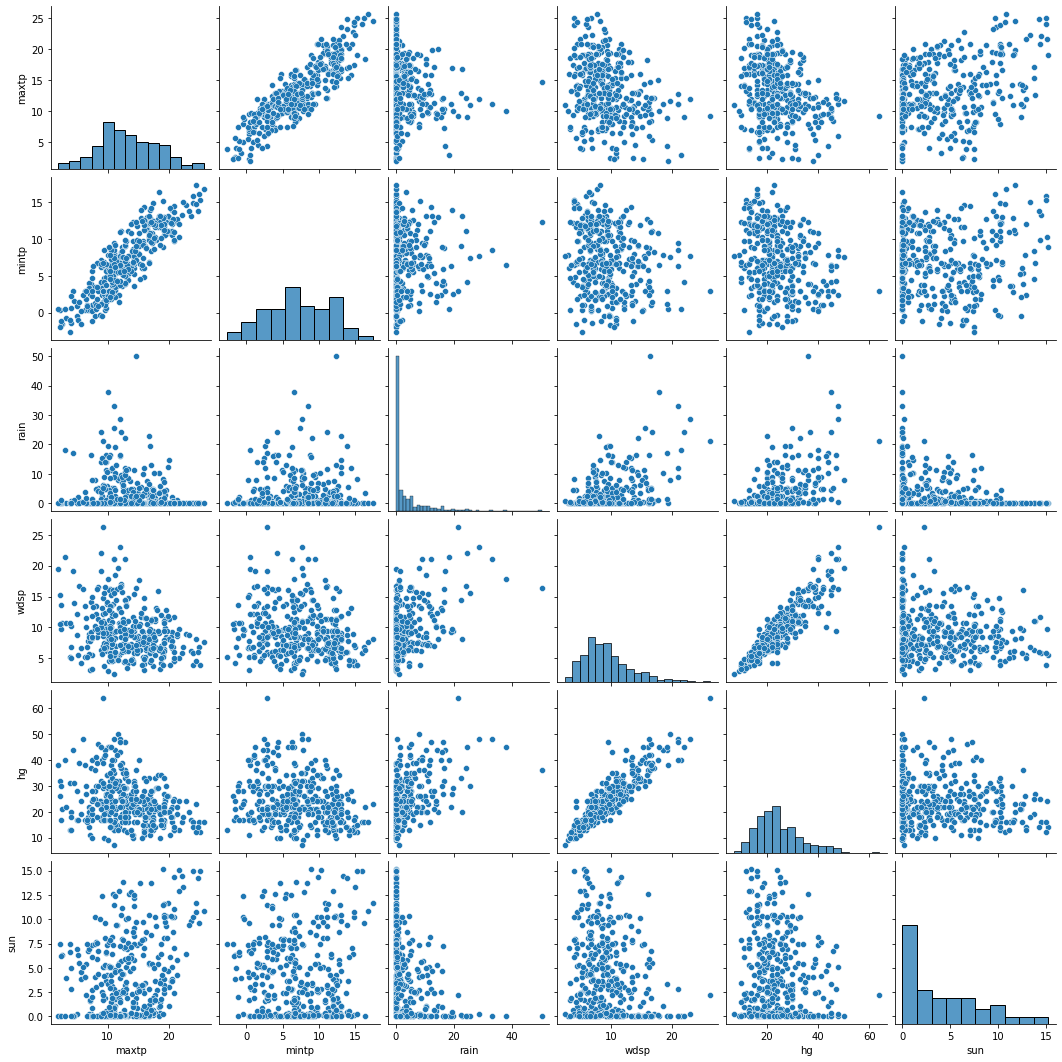

In [13]:
#graphical summary
weather_cor = weather_cork
weather_cor = weather_cor.drop(['day','year'],axis = 1)
sns.pairplot(weather_cor)

In [ ]:
#Shannon airport

weather_shannon = weather_df[weather_df['station']== 'Shannon Airport']
weather_shannon.head()

In [ ]:
#numerical summary
weather_shannon.describe()

In [ ]:
#graphical summary
weather_sha = weather_shannon
weather_sha = weather_sha.drop(['day','year'],axis = 1)
sns.pairplot(weather_sha)